### Some Theory

##### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent

##### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

### How File I/O is done in most programming languages

- Open a file
- Read/Write data
- Close the file

### Writing to a file

In [3]:
# case 1 - if the file is not present
f = open('sample.txt','w')
f.write('Hello world')
f.close()
# since file is closed hence this will not work
f.write('hello')

ValueError: I/O operation on closed file.

In [5]:
# write multiline strings
f = open('sample1.txt','w')
f.write('hello world')
f.write('\nhow are you?')
f.write('\nWriting Multiple Lines through python')
f.close()

In [8]:
# case 2 - if the file is already present: This will replace old content with new content
f = open('sample.txt','w')
f.write('salman khan, shahrukh khan')
f.close()

In [ ]:
# how exactly open() works?

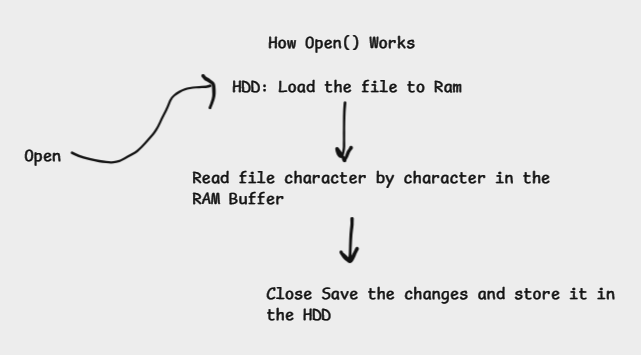

In [9]:
# Problem with w mode : Replace Old with New
# introducing append mode
f = open('sample.txt','a')
f.write('\nI am fine')
f.write('\nAdding with Append mode, This wont remove old content')
f.close()

In [10]:
# write lines : Multiple Lines with singlefunction
L = ['hello\n','hi\n','how are you\n','I am fine\n',"Adding with Write Lines\n","This will help to add multiple lines with single code."]

f = open('./sample.txt','w')
f.writelines(L)
f.close()

In [13]:
# reading from files
# -> using read()
f = open('./sample.txt','r')
s = f.read()
print(s)
f.close()

hello
hi
how are you
I am fine
Adding with Write Lines
This will help to add multiple lines with single code.


In [20]:
# reading upto n chars
f = open('./sample.txt','r')
s = f.read(12)
print(s)
f.close()

hello
hi
how


In [24]:
# readline() -> to read line by line
f = open('./sample.txt','r')
print(f.readline(),end='')
print(f.readline(),end='')
f.close()

hello
hi


When to use read vs When to use ReadLine
Read: Small File
Readline: With files which has a large number of lines and we dont want to load entire file in the memory buffer

In [27]:
# reading entire using readline
f = open('./sample.txt','r')

while True:

  data = f.readline()

  if data == '':
    break
  else:
    print(data,end='')

f.close()

hello
hi
how are you
I am fine
Adding with Write Lines
This will help to add multiple lines with single code.

### Using Context Manager (With)

- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- "with" keyword closes the file as soon as the usage is over

In [33]:
# with
with open('./sample1.txt','w') as f:
  f.write('Selmon Bhai\n')

In [ ]:
f.write('hello') #This will throw error since file is already close

In [ ]:
# try f.read() now
with open('./sample.txt','r') as f:
  # print(f.read())
  # print(f.readline())
  # print(f.readlines())

['hello\n', 'hi\n', 'how are you\n', 'I am fine\n', 'Adding with Write Lines\n', 'This will help to add multiple lines with single code.']


In [46]:
# moving within a file -> 10 char then 10 char
with open('sample.txt','r') as f:
  print(f.read(10))
  print(f.read(10)) #this will print next 10 
  print(f.read(10))
  print(f.read(10))
  # This is Done due to buffer memory allocation, Loading in chunks

hello
hi
h
ow are you

I am fine

Adding wi


In [55]:
# benefit? -> to load a big file in memory
big_L = ['hello world ' for i in range(1000)]

with open('big.txt','w') as f:
  f.writelines(big_L)


In [56]:
# This whole file is loaded in chunks not entirely so not much ram is consumed
with open('big.txt','r') as f:

  chunk_size = 100
  count=0
  while len(f.read(chunk_size)) > 0:
    print(f.read(chunk_size),end='*')
    count+=1
    f.read(chunk_size) #load the next lines
  print("Total Chunks Used:",count)

o world hello world hello world hello world hello world hello world hello world hello world hello wo*o world hello world hello world hello world hello world hello world hello world hello world hello wo*o world hello world hello world hello world hello world hello world hello world hello world hello wo*o world hello world hello world hello world hello world hello world hello world hello world hello wo*o world hello world hello world hello world hello world hello world hello world hello world hello wo*o world hello world hello world hello world hello world hello world hello world hello world hello wo*o world hello world hello world hello world hello world hello world hello world hello world hello wo*o world hello world hello world hello world hello world hello world hello world hello world hello wo*o world hello world hello world hello world hello world hello world hello world hello world hello wo*o world hello world hello world hello world hello world hello world hello world hello world

In [59]:
with open("./sample.txt", "r") as f:
    print(f.read(10)) #read 10
    print(f.tell()) # tell that we are at 11th
    print(f.seek(0)) # we need to print again from 0 not from 11the
    print(f.read(10))

hello
hi
h
12
0
hello
hi
h


In [60]:
# seek and tell function
with open('sample.txt','r') as f:
  f.seek(15) # to move the cursor to a certain character
  print(f.read(10))
  print(f.tell()) #this will show next konsa character process hoga

  print(f.read(10))
  print(f.tell())

are you
I 
26
am fine
Ad
37


In [62]:
# seek during write
with open('sample.txt','w') as f:
  f.write('Hello')
  f.seek(0)
  f.write('Xa') #this will change first 2 character of the Content
  """Utna hi Content replace hoga jitna We have pass in after the seek write, because we are doing the write operation in the single open of file"""

### Problems with working in text mode

- can't work with binary files like images
- not good for other data types like int/float/list/tuples

In [ ]:
# working with binary file: This will throw error
with open('1.png','r') as f:
  f.read()

In [64]:
# working with binary file (rb: Read Binary)
with open('1.png','rb') as f:
  with open('screenshot_1_copy.png','wb') as wf:
    wf.write(f.read())

In [ ]:
# working with a big binary file

In [ ]:
# working with other data types
with open('sample.txt','w') as f:
  f.write(5) #This will throw error we cannot write any other datatype

In [67]:
with open('sample.txt','w') as f:
  f.write('5')

In [69]:
with open('sample.txt','r') as f:
  print(int(f.read()) + 5)

10


In [71]:
# more complex data
d = {
    'name':'Anas',
     'age':21,
     'gender':'Male'
}

with open('sample.txt','w') as f:
  # f.write(d)
  f.write(str(d))

In [ ]:
with open('sample.txt','r') as f:
  print(f.read())
  # print(dict(f.read()))

String ko Dictionary mai convert nhi karsakte hai, Thus read and write operations with other data types are Not possible thus we study Serialization and Deserialization

### Serialization and Deserialization

- **Serialization** - process of converting python data types to JSON format
- **Deserialization** - process of converting JSON to python data types

#### What is JSON?


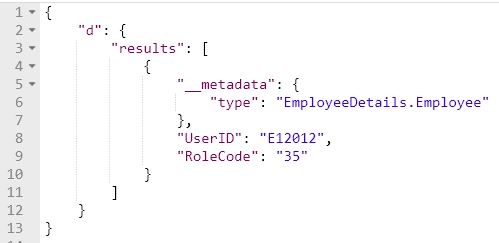

Javascript On Notation. It is the universal text format accept by all the programming languages. It is very important

In [74]:
# serialization using json module
# list to Json
import json

L = [1,2,3,4]

with open('demo.json','w') as f:
  json.dump(L,f) #dump(what to dump, file handler object)


In [78]:
# dict
d = {
    'name':'Anas',
     'age':21,
     'gender':'Male'
}

with open('demo.json','w') as f:
  # json.dump(d,f)
  json.dump(d,f,indent=4)

In [79]:
# Reading the File
# deserialization
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'name': 'Anas', 'age': 21, 'gender': 'Male'}
<class 'dict'>


In [85]:
"""This is the thing type is list not the tuple"""
# serialize and deserialize tuple
import json

t = (1,2,3,4,5)

with open('demo.json','w') as f:
  json.dump(t,f)

In [86]:
import json

with open("./demo.json","r") as f:
    a= json.load(f)
    print(a)
    print(type(a)) 

[1, 2, 3, 4, 5]
<class 'list'>


In [88]:
# serialize and deserialize a nested dict

d = {
    'student':'Anas',
     'marks':[73,84,84,95,96]
}

with open('demo.json','w') as f:
  json.dump(d,f,indent=4)

### Serializing and Deserializing custom objects

In [96]:
class Person:

  def __init__(self,fname,lname,age,gender):
    self.fname = fname
    self.lname = lname
    self.age = age
    self.gender = gender

# format to printed in
# -> Anas Khan age -> 21 gender -> Male

In [97]:
person = Person('Anas','Khan',21,'Male')

In [101]:
# As a string
import json

# We have to specify how our object is going to serialize

def show_object(person):
  if isinstance(person,Person):
    return "{} {} age -> {} gender -> {}".format(person.fname,person.lname,person.age,person.gender)

with open('demo.json','w') as f:
  # json.dump(person,f)
  json.dump(person,f,default=show_object) #serialize as per mentioned in the show_object function

In [103]:
# As a dict
import json

def show_object(person):
  if isinstance(person,Person):
    return {'name':person.fname + ' ' + person.lname,'age':person.age,'gender':person.gender}

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object,indent=4)

In [ ]:
# indent arrtribute
# As a dict

In [104]:
# deserializing
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'name': 'Anas Khan', 'age': 21, 'gender': 'Male'}
<class 'dict'>


### Pickling
`Pickling` is the process whereby a Python object hierarchy is converted into a byte stream, and `unpickling` is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

It is the concept of storing object as it is in a file and then we can use them for the things which we can do on them as they were object.

Till now what we have done is converting our object to another format in order to use but then we cannot perform the same object methods which we can perform on it. Thus this concept came in the picture

In [110]:
class Person:

  def __init__(self,name,age):
    self.name = name
    self.age = age

  def display_info(self):
    print(f'Hi my name is {self.name} and I am {self.age} years old')

In [111]:
p = Person('Anas',21)


In [112]:
# pickle dump
import pickle
with open('person.pkl','wb') as f:
  pickle.dump(p,f)

In [113]:
# pickle load
import pickle
with open('person.pkl','rb') as f:
  p = pickle.load(f)
  print(p)
  print(type(p))

p.display_info()

<class '__main__.Person'>
Hi my name is Anas and I am 21 years old


### Pickle Vs Json

- Pickle lets the user to store data in binary format. When we need to retain the functionality.
- JSON lets the user store data in a human-readable text format.